
# YELP 서비스의 리뷰 분석 (NLP)




# PROBLEM STATEMENT

- stars 컬럼은, 유저가 1점부터 5점까지 준 별점이 들어있다.
- text 컬럼은, 별점을 준 유저의 리뷰가 들어있다. 
- cool, useful, funny 컬럼은, 다른사람들이 이 리뷰 글에 투표한 숫자다. 따라서 쿨이 3개이면, 이 리뷰에 대해서 3명이 쿨에 공감했다는 뜻이다.

# STEP #0: LIBRARIES IMPORT


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/day11')

# STEP #1: IMPORT DATASET

### yelp.csv 파일을 읽어서, yelp_df 변수에 저장하고, 기본적인 통계 분석을 하시오.

In [5]:
yelp_df =  pd.read_csv('yelp.csv')

In [7]:
yelp_df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


# STEP #2: VISUALIZE DATASET

### 리뷰 데이터의 길이를 구하여, 새로운 컬럼 length 컬럼을 만드시오

In [8]:
yelp_df['length'] = yelp_df['text'].apply(len)


### 리뷰의 length를 히스토그램으로 나타내시오.  

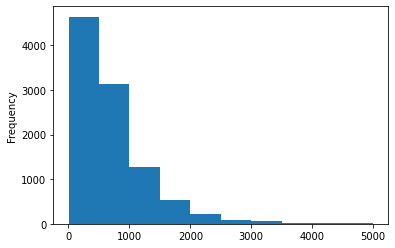

In [9]:
yelp_df.length.plot(kind = 'hist')
plt.show()

In [10]:
yelp_df.length.describe()

count    10000.000000
mean       710.738700
std        617.399827
min          1.000000
25%        294.000000
50%        541.500000
75%        930.000000
max       4997.000000
Name: length, dtype: float64

### 리뷰가 가장 긴 글을 찾아서, 리뷰 내용을 보여주세요.

In [16]:
yelp_df.loc[  yelp_df['length'] == yelp_df['length'].max()   ,    ]

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
55,FCcFT610nQBVcRdY-devQA,2012-01-14,6jRs2P6zTYMn36fVnCu1Zw,4,"In our continuing quest to identify cool, loca...",review,40aklZ2SQPKnlTPZdvAqww,0,1,0,4997


In [ ]:
yelp_df.loc[  yelp_df['length'] == yelp_df['length'].max()   ,  'text'  ].values[0]

### 리뷰가 가장 짧은 리뷰는 총 몇개이며, 리뷰 내용은 무엇입니까?

In [17]:
yelp_df.loc[  yelp_df['length'] == yelp_df['length'].min()   ,    ]

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
6450,tbRu-3NR5za1SEZkszcp5Q,2012-01-03,IVoMGfn9QrZ4dATwc9HBcg,3,X,review,SHcX9hp5RG3-OqsbvissIQ,0,0,0,1


### 별점은 1점부터 5점까지 입니다. 각 별점별로 리뷰가 몇개씩 있는지를 시각화 하시오.

In [21]:
order_index = yelp_df['stars'].value_counts().index

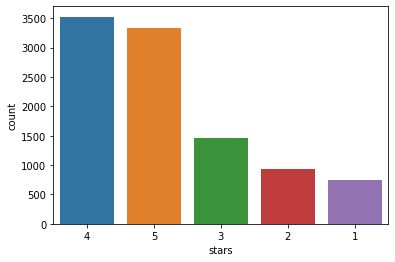

In [22]:
sns.countplot(data = yelp_df, x = 'stars' ,  order=order_index)
plt.show()

### 별점별로 리뷰가 몇개씩 있는지 시각화 하되, 내림차순으로 정렬하여 시각화 하시오.

### 별점이 1점인 리뷰의 데이터프레임과, 별점아 5점인 데이터프레임을 각각 따로 아래의 변수에 저장하시오.
### 변수명은 yelp_df_1 , yelp_df_5 로 저장하시오.

In [23]:
yelp_df_1 = yelp_df.loc[  yelp_df.stars == 1   ,  ]

In [ ]:
yelp_df_1

In [25]:
yelp_df_5 = yelp_df.loc[  yelp_df.stars == 5   ,  ]

In [ ]:
yelp_df_5

### yelp_df_1 , yelp_df_5 두개의 데이터프레임을 하나로 합치시오.  긍정과 부정의 리뷰 학습을 위해서 하나로 합치는 것이다.

In [27]:
yelp_df_1_5 = pd.concat( [yelp_df_1, yelp_df_5] )

In [28]:
yelp_df_1_5

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
23,IJ0o6b8bJFAbG6MjGfBebQ,2010-09-05,Dx9sfFU6Zn0GYOckijom-g,1,U can go there n check the car out. If u wanna...,review,zRlQEDYd_HKp0VS3hnAffA,0,1,1,594
31,vvA3fbps4F9nGlAEYKk_sA,2012-05-04,S9OVpXat8k5YwWCn6FAgXg,1,Disgusting! Had a Groupon so my daughter and ...,review,8AMn6644NmBf96xGO3w6OA,0,1,0,361
35,o1GIYYZJjM6nM03fQs_uEQ,2011-11-30,ApKbwpYJdnhhgP4NbjQw2Q,1,"I've eaten here many times, but none as bad as...",review,iwUN95LIaEr75TZE_JC6bg,0,4,3,1198
61,l4vBbCL9QbGiwLuLKwD_bA,2011-11-22,DJVxOfj2Rw9zklC9tU3i1w,1,I have always been a fan of Burlington's deals...,review,EPROVap0M19Y6_4uf3eCmQ,0,0,0,569
64,CEswyP-9SsXRNLR9fFGKKw,2012-05-19,GXj4PNAi095-q9ynPYH3kg,1,Another night meeting friends here. I have to...,review,MjLAe48XNfYlTeFYca5gMw,0,1,2,498
...,...,...,...,...,...,...,...,...,...,...,...
9990,R8VwdLyvsp9iybNqRvm94g,2011-10-03,pcEeHdAJPoFNF23es0kKWg,5,Yes I do rock the hipster joints. I dig this ...,review,b92Y3tyWTQQZ5FLifex62Q,1,1,1,263
9991,WJ5mq4EiWYAA4Vif0xDfdg,2011-12-05,EuHX-39FR7tyyG1ElvN1Jw,5,Only 4 stars? \n\n(A few notes: The folks that...,review,hTau-iNZFwoNsPCaiIUTEA,1,1,0,908
9992,f96lWMIAUhYIYy9gOktivQ,2009-03-10,YF17z7HWlMj6aezZc-pVEw,5,I'm not normally one to jump at reviewing a ch...,review,W_QXYA7A0IhMrvbckz7eVg,2,3,2,1326
9994,L3BSpFvxcNf3T_teitgt6A,2012-03-19,0nxb1gIGFgk3WbC5zwhKZg,5,Let's see...what is there NOT to like about Su...,review,OzOZv-Knlw3oz9K5Kh5S6A,1,2,1,1968


### 별점 1과 별점 5의 리뷰는 몇개씩인지, 시각화 하시오.

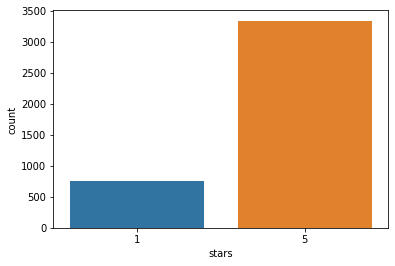

In [29]:
sns.countplot(data= yelp_df_1_5 , x = 'stars')
plt.show()

### 별점 1점과 별점 5점의 리뷰의 비율이 나오도록, 파이차트로 시각화 하시오.

In [31]:
star_data = yelp_df_1_5['stars'].value_counts()

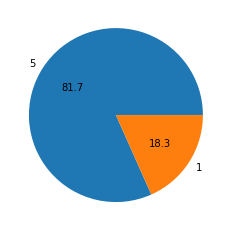

In [34]:
plt.pie(star_data , autopct='%.1f' , labels=star_data.index)
plt.show()

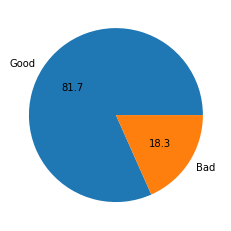

In [35]:
plt.pie(star_data , autopct='%.1f' , labels=['Good', 'Bad'])
plt.show()

# STEP #3: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

# STEP 3.1 Punctuation (구두점) 제거

In [36]:
import string

# STEP 3.2 STOPWORDS (불용어) 제거

In [37]:
import nltk

In [38]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [39]:
from nltk.corpus import stopwords

In [40]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# 테스트용 문장
mini_challenge = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations!'

# STEP 3.3 COUNT VECTORIZER 를 사용하여, 문자를 숫자로 바꿔준다.

In [41]:

from sklearn.feature_extraction.text import CountVectorizer

# 정리 : 위의 과정을 하나의 함수로 만든다.

In [42]:
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

### yelp_df_1_5 데이터프레임의 text 컬럼에, 클리닝 함수를 적용한다.

In [ ]:
yelp_df_clean = 

# COUNT VECTORIZER 에 클리닝 함수를 애널라이저로 적용하여, 단어를 숫자로 바꾼다.

In [43]:
vectorizer = CountVectorizer(analyzer = message_cleaning)


In [44]:
yelp_countvectorizer = vectorizer.fit_transform( yelp_df_1_5['text']  )


# STEP#4: 학습용과 테스트용으로 데이터프레임을 나눈다. 테스트용은 20%로 설정한다. 그리고 나이브베이즈 모델링 한다.

In [45]:
X = yelp_countvectorizer

In [47]:
y = yelp_df_1_5['stars']

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 7)

In [49]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
# from sklearn.naive_bayes import GaussianNB

# GB_classifier = GaussianNB()
# GB_classifier.fit(X_train, y_train)

# STEP#5: 테스트셋으로 모델 평가. 컨퓨전 매트릭스 사용한다.

In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
y_pred = NB_classifier.predict(X_test)

In [52]:
cm = confusion_matrix(y_test, y_pred)

In [53]:
cm

array([[106,  61],
       [ 20, 631]])

In [54]:
(106+631) / cm.sum()

0.9009779951100244

# STEP#6 다음 문장이 긍정인지 부정인지 예측하시오.


### 1. 'amazing food! highly recommmended'
### 2. 'shit food, made me sick'

In [56]:
testing_sample = ['amazing food! highly recommmended']
testing_sample_countvectorizer = vectorizer.transform(testing_sample)
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array([5])

In [58]:
testing_sample = ['shit food, made me sick']
testing_sample_countvectorizer = vectorizer.transform(testing_sample)
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array([1])